In [84]:

from sys import path
import grid_set as gs
import itertools
import numpy as np
from scipy import stats
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime as dt
from dateutil.relativedelta import relativedelta
import copy
from imp import reload
reload(gs)

<module 'grid_set' from '/Users/h/Github/CMIP6_data/grid_set.py'>

In [85]:
# m = ccrs.NorthPolarStereo()
## NSIDC grid
m = ccrs.NorthPolarStereo(central_longitude=-45)

In [86]:
G = gs.grid_set(m)
G.load_grid('./NSIDC_gs.npz')
# G.load_mask('./Ease_reduced_for Eco_mask.npz')
G.get_grid_mask()

Loaded a grid: ./NSIDC_gs.npz


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


['AS-RCEC--TaiESM1_ensembles_used',
 'BCC--BCC-CSM2-MR_ensembles_used',
 'CAMS--CAMS-CSM1-0_ensembles_used',
 'CAS--FGOALS-f3-L_ensembles_used',
 'CAS--FGOALS-g3_ensembles_used',
 'CCCma--CanESM5-CanOE_ensembles_used',
 'CCCma--CanESM5_ensembles_used',
 'CNRM-CERFACS--CNRM-CM6-1-HR_ensembles_used',
 'CNRM-CERFACS--CNRM-CM6-1_ensembles_used',
 'CNRM-CERFACS--CNRM-ESM2-1_ensembles_used',
 'CSIRO--ACCESS-ESM1-5_ensembles_used',
 'CSIRO-ARCCSS--ACCESS-CM2_ensembles_used',
 'DKRZ--MPI-ESM1-2-HR_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3-CC_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3-Veg-LR_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3-Veg_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3_ensembles_used',
 'FIO-QLNM--FIO-ESM-2-0_ensembles_used',
 'IPSL--IPSL-CM6A-LR_ensembles_used',
 'MIROC--MIROC-ES2L_ensembles_used',
 'MIROC--MIROC6_ensembles_used',
 'MOHC--HadGEM3-GC31-LL_ensembles_used',
 'MOHC--UKESM1-0-LL_ensembles_used',
 'MPI-M--MPI-ESM1-2-LR_ensembles_used',
 'MRI--

In [87]:
data_IC = {}
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/First_IC_ensemble_save_ssp245.nc')
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/IC_ensemble_submean_save_+ssp245.nc')
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/Minimums/IC_ensemble_submean_save_ssp585.nc')
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/IC_ensemble_save_+ssp245.nc')
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/IC_ensemble_save_ssp585.nc')
f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/sithick_ensemble_save_ssp585.nc')
for key in f_nc.variables:
    print(key)
    data_IC[key] = f_nc.variables[key][:]
data_IC['Model_list'] = [d for d in dir(f_nc) if 'ensembles_used' in d]
for md in data_IC['Model_list']:
    data_IC[md] = f_nc.getncattr(md)
f_nc.close()

ice_area_ensemble
ice_extent_ensemble
lon
lat
time


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  del sys.path[0]


In [88]:
# data_IC = {}
extra_name = '_extra'
f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/IC_ensemble_save_ssp585.nc')
for key in f_nc.variables:
    print(key)
    data_IC[key+extra_name] = f_nc.variables[key][:]
data_IC['Model_list'] = [d for d in dir(f_nc) if 'ensembles_used' in d]
for md in data_IC['Model_list']:
    data_IC[md] = f_nc.getncattr(md)
f_nc.close()

ice_area_ensemble
ice_extent_ensemble
lon
lat
time


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  import sys
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if __name__ == '__main__':


In [90]:
d0 = dt.datetime(2000,1,1)
data_IC['dtime'] = [d0 + relativedelta(days = d*1.) for d in data_IC['time']]

In [91]:
dnow = data_IC['dtime'][40]
ICnow = data_IC['ice_area_ensemble'][40]
ICnow_E = data_IC['ice_area_ensemble_extra'][40]
# ICnow = data_IC['ice_extent_ensemble'][0]
nmodels = len(data_IC['Model_list'])

In [120]:
G.xpts.min()

-3977086.4228193955

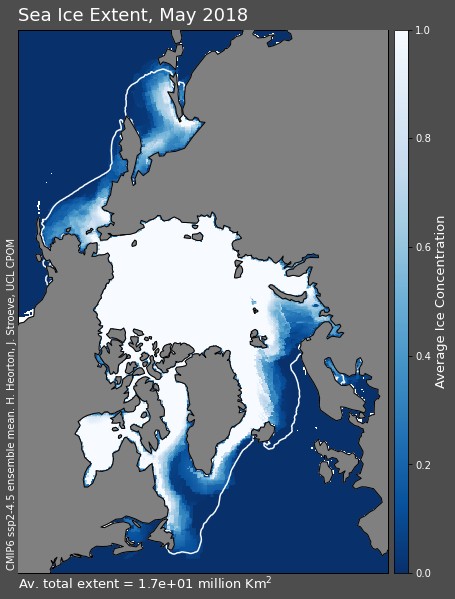

In [61]:
f = plt.figure(figsize=(12, 10))
# f.patch.set_facecolor('gray')
f.patch.set_facecolor([0.3,0.3,0.3])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent(G.limits,m)

### set up plotting
plot_temp = ICnow
plot_temp_E = ICnow_E
# plot_temp = ICnow>0.15

plot_temp_A = ICnow>0.15
area = np.sum(plot_temp_A*G.area)*1e-12

s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=1.0,cmap='Blues_r')
# ax.plot(gs.border(G.xpts),gs.border(G.ypts))
if area>0.5:
    ax.contour(G.xpts,G.ypts,plot_temp_E,[0.15],cmap='Blues')

# ax.plot(Big.xpts,Big.ypts)
# s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
ax.add_feature(cfeature.COASTLINE,zorder=4)
ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Extent, '+dnow.strftime('%b %Y'),
        fontsize = 18,color='w')
ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
        fontsize = 10,color='w',rotation = 90)
ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total extent = '+'{:.2}'.format(area)+' million Km$^{2}$',
        fontsize = 13,color='w')

cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
# cax.set_ticks([0.1,0.8],color='w')
ticks=np.arange(0.0,1.2,0.2)
tlab = ['{:.2}'.format(t) for t in ticks]
# tlab = [int(t*nmodels) for t in ticks]
cax.ax.yaxis.set_ticks(ticks)
cax.ax.yaxis.set_ticklabels(tlab,color='w')
# cax.set_label('No. models with ice present',color='w',fontsize=13)
cax.set_label('Average Ice Concentration',color='w',fontsize=13)
output = plt.plot([])
plt.show()

In [63]:
import matplotlib.colors as mcolors

cut = 64
# colors1 = plt.cm.plasma(np.linspace(0., 1, cut))
# colors2 = plt.cm.viridis_r(np.linspace(0, 1, 256-cut))
# colors1 = plt.cm.viridis(np.linspace(0., 1, cut))
colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, cut))
colors2 = plt.cm.magma_r(np.linspace(0, 1, 256-cut))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 64))
# colors2 = plt.cm.YlOrRd(np.linspace(0, 1, 74))
# colors3 = plt.cm.PuRd_r(np.linspace(0, 1, 168))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
# colors = np.vstack((colors1, colors2[:-10], colors3[40:]))
mymap = mcolors.LinearSegmentedColormap.from_list('my_cmap', colors)

# plt.pcolor(data, cmap=mymap)
# plt.colorbar()
# plt.show()

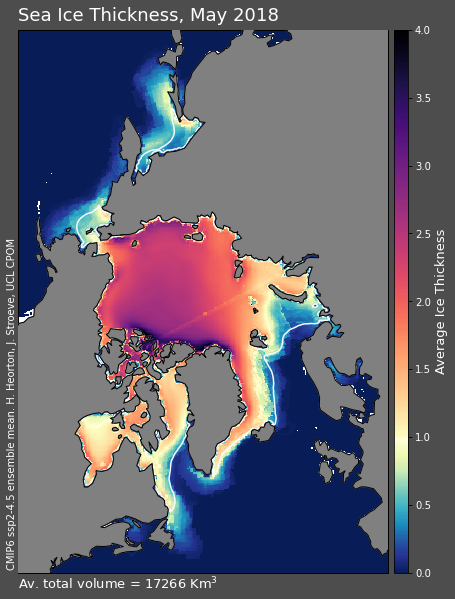

In [92]:
f = plt.figure(figsize=(12, 10))
# f.patch.set_facecolor('gray')
f.patch.set_facecolor([0.3,0.3,0.3])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent(G.limits,m)

### set up plotting
plot_temp = ICnow
plot_temp_E = ICnow_E
# plot_temp = ICnow>0.15

plot_temp_A = ICnow>0.15
volume = np.sum(plot_temp_A*G.area)*1e-9

s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=4.0,cmap=mymap)
# ax.plot(gs.border(G.xpts),gs.border(G.ypts))
if volume>0.5:
    ax.contour(G.xpts,G.ypts,plot_temp_E,[0.15],cmap='Blues')

# ax.plot(Big.xpts,Big.ypts)
# s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
ax.add_feature(cfeature.COASTLINE,zorder=4)
ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Thickness, '+dnow.strftime('%b %Y'),
        fontsize = 18,color='w')
ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
        fontsize = 10,color='w',rotation = 90)
ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total volume = '+'{0:.0f}'.format(int(volume))+' Km$^{3}$',
        fontsize = 13,color='w')

cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
# cax.set_ticks([0.1,0.8],color='w')
ticks=np.arange(0.0,4.5,0.5)
tlab = ['{:.1f}'.format(t) for t in ticks]
# tlab = [int(t*nmodels) for t in ticks]
cax.ax.yaxis.set_ticks(ticks)
cax.ax.yaxis.set_ticklabels(tlab,color='w')
# cax.set_label('No. models with ice present',color='w',fontsize=13)
cax.set_label('Average Ice Thickness',color='w',fontsize=13)
output = plt.plot([])
plt.show()

In [107]:
#### add in prev sept/march to set contour
sept_c = None
marh_c = None
from matplotlib.backends.backend_agg import FigureCanvasAgg 
import imageio
def make_frame(y):
    global sept_c
    global marh_c
    f = plt.figure(figsize=(12, 10))
    # f.patch.set_facecolor('gray')
    canvas = FigureCanvasAgg(f)
    f.patch.set_facecolor([0.3,0.3,0.3])
    ax = f.add_subplot(1,1,1,projection=m)
    ax.set_extent(G.limits,m)

    dnow = data_IC['dtime'][y]
    
    ICnow = data_IC['ice_area_ensemble'][y]
    ICnow_E = data_IC['ice_area_ensemble_extra'][y]
#     ICnow = data_IC['ice_extent_ensemble'][y]
    ### set up plotting
    plot_temp = ICnow
    plot_temp_E = ICnow_E
    # plot_temp = ICnow>0.15

    plot_temp_A = ICnow
    area = np.sum(plot_temp_E*G.area)*1e-12
    volume = np.sum(plot_temp_A*G.area)*1e-9
    if dnow.month == 3:
        marh_c = plot_temp_E
    if dnow.month == 9:
        sept_c = plot_temp_E
        area = np.sum((plot_temp_E>0.15)*G.area)*1e-12
        if area<0.2: sept_c = None

    s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=4.0,cmap=mymap)
    # ax.plot(gs.border(G.xpts),gs.border(G.ypts))
    if sept_c is not None:
        ax.contour(G.xpts,G.ypts,sept_c,[0.15],cmap='Greys_r')
    if marh_c is not None:
        ax.contour(G.xpts,G.ypts,marh_c,[0.15],cmap='Blues')

    # ax.plot(Big.xpts,Big.ypts)
    # s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
    ax.add_feature(cfeature.COASTLINE,zorder=4)
    ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
    ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Thickness, '+dnow.strftime('%b %Y'),
            fontsize = 18,color='w')
#     ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
    ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp5-8.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
            fontsize = 10,color='w',rotation = 90)
    ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total volume = '+'{0:.0f}'.format(int(volume))+' Km$^{3}$',
            fontsize = 13,color='w')

    cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
    # cax.set_ticks([0.1,0.8],color='w')
    ticks=np.arange(0.0,4.5,0.5)
    tlab = ['{:.1f}'.format(t) for t in ticks]
    # tlab = [int(t*nmodels) for t in ticks]
    cax.ax.yaxis.set_ticks(ticks)
    cax.ax.yaxis.set_ticklabels(tlab,color='w')
    # cax.set_label('No. models with ice present',color='w',fontsize=13)
    cax.set_label('Average Ice Thickness',color='w',fontsize=13)
    output = plt.plot([])

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

# Option 2a: Convert to a NumPy array.
    image = np.fromstring(s, np.uint8).reshape((height, width, 4))

    i_m,i_n,iii = image.shape
    ### remove outer x%
#     cl_px = 0.17
#     cl_py = 0.07
#     m_cl = int(i_m*cl_px)
#     n_cl = int(i_n*cl_py)
#     image = image[m_cl:-m_cl+10,n_cl:-n_cl,:]
#     image = image[55:-68,280:-130,:]
    image = image[55:-68,282:-128,:]
    plt.close()
    return image
#     plt.show()

In [10]:
from matplotlib.backends.backend_agg import FigureCanvasAgg 
import imageio
def make_frame(y):
    f = plt.figure(figsize=(12, 10))
    # f.patch.set_facecolor('gray')
    canvas = FigureCanvasAgg(f)
    f.patch.set_facecolor([0.3,0.3,0.3])
    ax = f.add_subplot(1,1,1,projection=m)
    ax.set_extent(G.limits,m)

    dnow = data_IC['dtime'][y]
    ICnow = data_IC['ice_area_ensemble'][y]
#     ICnow = data_IC['ice_extent_ensemble'][y]
    ### set up plotting
#     plot_temp = ICnow
    plot_temp = ICnow>0.15

#     plot_temp_A = ICnow>0.5
    plot_temp_A = ICnow>0.15
    area = np.sum(plot_temp_A*G.area)*1e-12

    s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=1.0,cmap='Blues_r')
    ax.plot(gs.border(G.xpts),gs.border(G.ypts))

    # ax.plot(Big.xpts,Big.ypts)
    # s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
    ax.add_feature(cfeature.COASTLINE,zorder=4)
    ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
    ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Thickness, '+dnow.strftime('%b %Y'),
            fontsize = 18,color='w')
    ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
            fontsize = 10,color='w',rotation = 90)
    ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total extent = '+'{:.2}'.format(area)+' million Km$^{2}$',
            fontsize = 13,color='w')

#     cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
    # cax.set_ticks([0.1,0.8],color='w')
    ticks=np.arange(0.0,1.2,0.2)
    # tlab = ['{:.2}'.format(t) for t in ticks]
    tlab = [int(t*nmodels) for t in ticks]
#     cax.ax.yaxis.set_ticks(ticks)
#     cax.ax.yaxis.set_ticklabels(tlab,color='w')
#     cax.set_label('No. models with ice present',color='w',fontsize=13)
    ax.text(G.limits[1]*1.1,0.0,'15% contour of the ensemble mean sea ice area',
            horizontalalignment='center',
            fontsize = 10,color='w',rotation = 270)
    
    
    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

# Option 2a: Convert to a NumPy array.
    image = np.fromstring(s, np.uint8).reshape((height, width, 4))

    i_m,i_n,iii = image.shape
    ### remove outer x%
#     cl_px = 0.17
#     cl_py = 0.07
#     m_cl = int(i_m*cl_px)
#     n_cl = int(i_n*cl_py)
#     image = image[m_cl:-m_cl+10,n_cl:-n_cl,:]
#     image = image[55:-68,280:-130,:]
    image = image[55:-68,210:-200,:]
    plt.close()
    return image
#     plt.show()

In [95]:
from matplotlib.backends.backend_agg import FigureCanvasAgg 
import imageio
def make_frame(y):
    f = plt.figure(figsize=(12, 10))
    # f.patch.set_facecolor('gray')
    canvas = FigureCanvasAgg(f)
    f.patch.set_facecolor([0.3,0.3,0.3])
    ax = f.add_subplot(1,1,1,projection=m)
    ax.set_extent(G.limits,m)

    dnow = data_IC['dtime'][y]
    ICnow = data_IC['ice_area_ensemble'][y]
#     ICnow = data_IC['ice_extent_ensemble'][y]
    ### set up plotting
    plot_temp = ICnow
    # plot_temp = ICnow>0.15

    plot_temp_A = ICnow>0.15
    area = np.sum(plot_temp_A*G.area)*1e-12

    s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=1.0,cmap='Blues_r')
    # ax.plot(gs.border(G.xpts),gs.border(G.ypts))
    if area>0.001:
        ax.contour(G.xpts,G.ypts,plot_temp,[0.15],cmap='Blues')

    # ax.plot(Big.xpts,Big.ypts)
    # s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
    ax.add_feature(cfeature.COASTLINE,zorder=4)
    ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
    ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Extent, '+dnow.strftime('%b %Y'),
            fontsize = 18,color='w')
#     ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
    ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp5-8.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
            fontsize = 10,color='w',rotation = 90)
    ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total extent = '+'{:.2g}'.format(area)+' million Km$^{2}$',
            fontsize = 13,color='w')

    cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
    # cax.set_ticks([0.1,0.8],color='w')
    ticks=np.arange(0.0,1.2,0.2)
    tlab = ['{:.2}'.format(t) for t in ticks]
    # tlab = [int(t*nmodels) for t in ticks]
    cax.ax.yaxis.set_ticks(ticks)
    cax.ax.yaxis.set_ticklabels(tlab,color='w')
    # cax.set_label('No. models with ice present',color='w',fontsize=13)
    cax.set_label('Average Ice Concentration',color='w',fontsize=13)
    output = plt.plot([])

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

# Option 2a: Convert to a NumPy array.
    image = np.fromstring(s, np.uint8).reshape((height, width, 4))

    i_m,i_n,iii = image.shape
    ### remove outer x%
#     cl_px = 0.17
#     cl_py = 0.07
#     m_cl = int(i_m*cl_px)
#     n_cl = int(i_n*cl_py)
#     image = image[m_cl:-m_cl+10,n_cl:-n_cl,:]
#     image = image[55:-68,280:-130,:]
    image = image[55:-68,282:-128,:]
    plt.close()
    return image
#     plt.show()

In [61]:
!rm Test_gif_no_model.gif 

rm: Test_gif_no_model.gif: No such file or directory


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


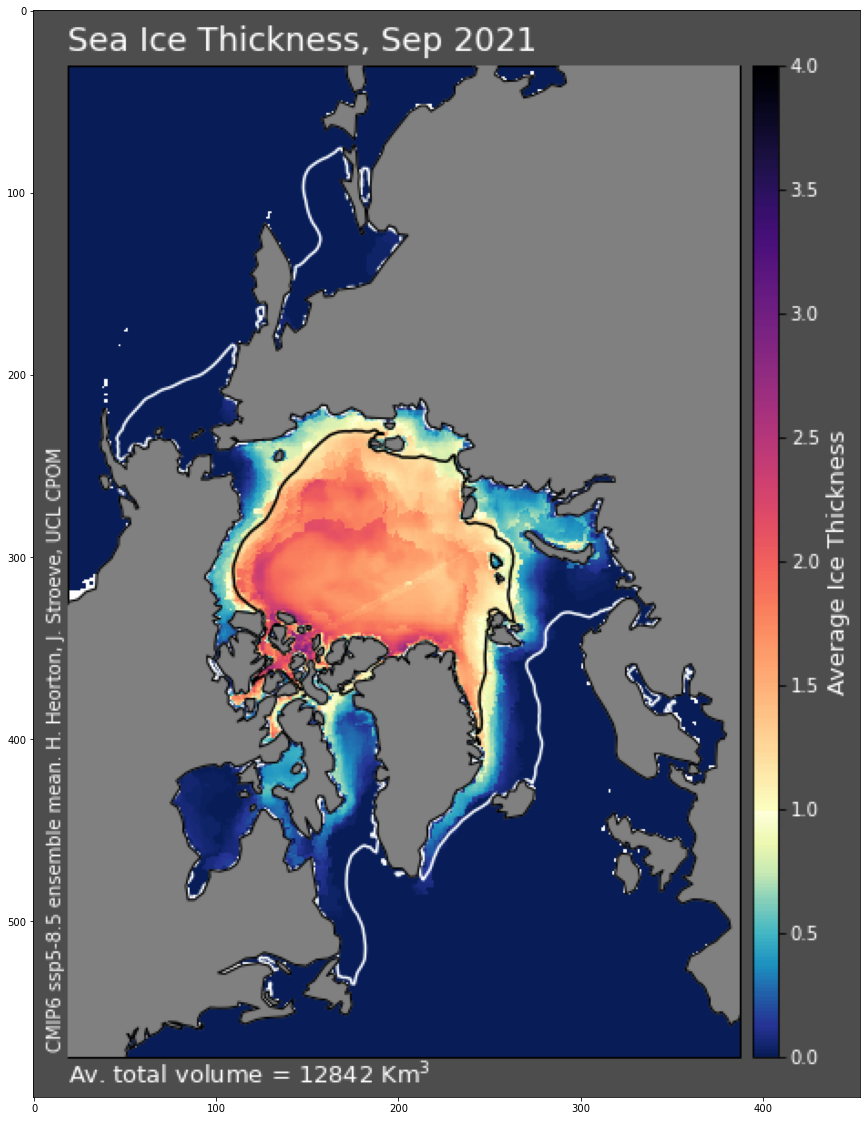

In [113]:
f = plt.figure(figsize=[20,20])
plt.imshow(make_frame(6*13+2))
# plt.imshow(make_frame(9))

In [115]:
# gfile = 'Ensemble_no_models_sept_extent.gif'
# gfile = 'Ensemble_ave_area_sept_extent.gif'
gfile = 'Ensemble_ens_av_area_year_thick_contour_ssp585.gif'
images = []
sept_c = None
marh_c = None
# for nt in range(n_t):
#### load the data from
for y in range(85*12):
# for y in range(36):
    if np.mod(y,24) == 0: print(y)
    image = make_frame(y)
    images.append(image)
        
imageio.mimsave(gfile, images, fps=12)

0


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008


In [117]:
gfile = 'Ensemble_ens_av_area_year_thick_contour_ssp585.mp4'

imageio.mimsave(gfile, images, fps=12)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (454, 597) to (464, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [142]:
data_IC['Model_list'][0]
# [d.split('--')[0] for d in data_IC['Model_list']]

'CSIRO--ACCESS-ESM1-5_ensembles_used'

In [143]:
for d in data_IC['Model_list']:
    cnt = 0
    new_str = []
    for ch in data_IC[d]:
        if ch is not ' ':
            new_str.append(ch)
        elif np.mod(cnt+1,4) != 0:
            new_str.append(ch)
            cnt += 1
        else:
            new_str.append('\n')
            cnt += 1
    data_IC[d+'_tidy'] =  ''.join(new_str)

In [144]:
### makes a table, copy paste it into a tex file
from tabulate import tabulate

# rows = [[Cmp['centre'],Cmp['name'],Cmp['ensemble']] for Cmp in Clist]
rows = [[d.split('--')[0],d.split('--')[1].split('_ensembles')[0], data_IC[d+'_tidy']] for d in data_IC['Model_list']]

print(tabulate(rows,
           headers=['Centre','Model','Ensemble']
               , tablefmt='fancy_grid'))

╒═════════════════════╤══════════════════╤════════════╕
│ Centre              │ Model            │ Ensemble   │
╞═════════════════════╪══════════════════╪════════════╡
│ CSIRO               │ ACCESS-ESM1-5    │ r10i1p1f1  │
├─────────────────────┼──────────────────┼────────────┤
│ CSIRO-ARCCSS        │ ACCESS-CM2       │ r1i1p1f1   │
├─────────────────────┼──────────────────┼────────────┤
│ DKRZ                │ MPI-ESM1-2-HR    │ r1i1p1f1   │
├─────────────────────┼──────────────────┼────────────┤
│ DWD                 │ MPI-ESM1-2-HR    │ r2i1p1f1   │
├─────────────────────┼──────────────────┼────────────┤
│ EC-Earth-Consortium │ EC-Earth3-CC     │ r1i1p1f1   │
├─────────────────────┼──────────────────┼────────────┤
│ EC-Earth-Consortium │ EC-Earth3-Veg-LR │ r1i1p1f1   │
├─────────────────────┼──────────────────┼────────────┤
│ EC-Earth-Consortium │ EC-Earth3-Veg    │ r1i1p1f1   │
├─────────────────────┼──────────────────┼────────────┤
│ EC-Earth-Consortium │ EC-Earth3        │ r1i1p